In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [13]:
def gaussian(height, center_x, center_y, width_x, width_y):
    """Returns a gaussian function with the given parameters"""
    width_x = float(width_x)
    width_y = float(width_y)
    return lambda x,y: height*np.exp(
                -(((center_x-x)/width_x)**2+((center_y-y)/width_y)**2)/2)

def moments(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution by calculating its
    moments """
    total = data.sum()
    X, Y = np.indices(data.shape)
    x = (X*data).sum()/total
    y = (Y*data).sum()/total
    col = data[:, int(y)]
    width_x = np.sqrt(np.abs((np.arange(col.size)-y)**2*col).sum()/col.sum())
    row = data[int(x), :]
    width_y = np.sqrt(np.abs((np.arange(row.size)-x)**2*row).sum()/row.sum())
    height = data.max()
    return height, x, y, width_x, width_y

def fitgaussian(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution found by a fit"""
    params = moments(data)
    errorfunction = lambda p: np.ravel(gaussian(*p)(*np.indices(data.shape)) -
                                 data)
    p, success = optimize.leastsq(errorfunction, params)
    return p

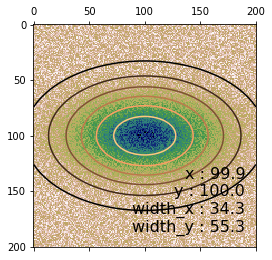

In [17]:
# Create the gaussian data
Xin, Yin = np.mgrid[0:201, 0:201]
data = gaussian(3, 100, 100, 20, 40)(Xin, Yin) + np.random.random(Xin.shape)

plt.matshow(data, cmap=plt.cm.gist_earth_r)

params = fitgaussian(data)
fit = gaussian(*params)

plt.contour(fit(*np.indices(data.shape)), cmap=plt.cm.copper)
ax = plt.gca()
(height, x, y, width_x, width_y) = params

plt.text(0.95, 0.05, """
x : %.1f
y : %.1f
width_x : %.1f
width_y : %.1f""" %(x, y, width_x, width_y),
        fontsize=16, horizontalalignment='right',
        verticalalignment='bottom', transform=ax.transAxes)
plt.show()

In [26]:
doex = [0.4,0.165,0.165,0.585,0.585]
doey = [.45, .22, .63, .22, .63]
doez = np.array([1, .99, .98,.97,.96])

def paraBolEqn(data,a,b,c,d):
    x,y = data
    return -(((x-b)/a)**2+((y-d)/c)**2)+1.0

data = np.vstack((doex,doey))
print(data)
zdata = doez

popt,pcov=opt.curve_fit(paraBolEqn,np.vstack((doex,doey)),doez,p0=[1.5,0.4])

[[ 0.4    0.165  0.165  0.585  0.585]
 [ 0.45   0.22   0.63   0.22   0.63 ]]


In [25]:
popt

array([ 1.68293045,  0.31074135,  2.38822062,  0.36205424])

In [76]:
doex=[1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,5,5,5,5,5]
doey=[1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5]
doez=[1,1,1,1,1,1,2,2,2,1,1,2,3,2,1,1,2,2,2,1,1,1,1,1,1]

data=np.vstack((doex,doey))

def paraboloid_eqn(data,a,b):
    x,y=data
    return -((x/a)**2+(y/b)**2)

zdata=doez

popt,pcov=opt.curve_fit(paraboloid_eqn,data,zdata,p0=[1,1])

In [77]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

<IPython.core.display.Javascript object>


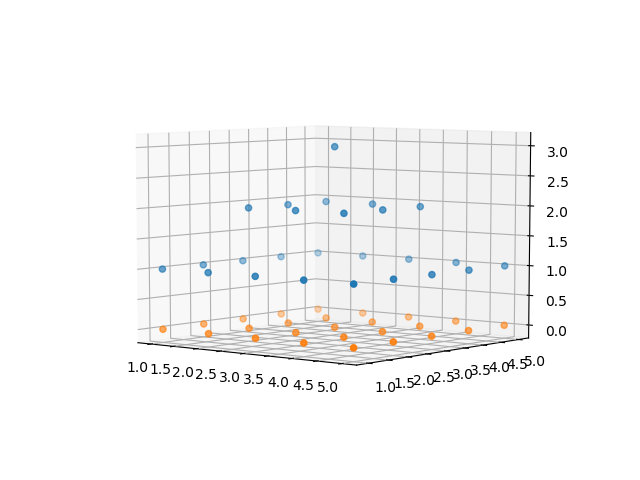

In [78]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter3D(doex,doey,doez)
ax.scatter3D(doex,doey,paraboloid_eqn(data,popt[0],popt[1]))
plt.show()

In [74]:
paraboloid_eqn(data,popt[0],popt[1])

array([ 0.09368687,  0.23421717,  0.46843434,  0.79633838,  1.21792929,
        0.23421717,  0.37474747,  0.60896464,  0.93686868,  1.35845959,
        0.46843435,  0.60896465,  0.84318182,  1.17108586,  1.59267676,
        0.79633839,  0.93686869,  1.17108586,  1.4989899 ,  1.9205808 ,
        1.2179293 ,  1.3584596 ,  1.59267677,  1.92058081,  2.34217172])

In [75]:
popt

array([ 4.62035808,  4.62035811])